In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from scipy.interpolate import make_interp_spline
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.manifold import TSNE

carmax=pd.read_csv("/Users/navyabingi/Downloads/Fall 2024 Dataset.csv")
state_to_region = {
    'CT': 'Northeast', 'ME': 'Northeast', 'MA': 'Northeast', 'NH': 'Northeast',
    'RI': 'Northeast', 'VT': 'Northeast', 'NJ': 'Northeast', 'NY': 'Northeast', 'PA': 'Northeast',
    'IL': 'Midwest', 'IN': 'Midwest', 'MI': 'Midwest', 'OH': 'Midwest', 'WI': 'Midwest',
    'IA': 'Midwest', 'KS': 'Midwest', 'MN': 'Midwest', 'MO': 'Midwest', 'NE': 'Midwest', 'ND': 'Midwest', 'SD': 'Midwest',
    'AL': 'South', 'AR': 'South', 'DE': 'South', 'DC': 'South', 'FL': 'South', 'GA': 'South', 'KY': 'South',
    'LA': 'South', 'MD': 'South', 'MS': 'South', 'NC': 'South', 'OK': 'South', 'SC': 'South', 'TN': 'South', 'TX': 'South',
    'VA': 'South', 'WV': 'South',
    'AZ': 'West', 'CO': 'West', 'ID': 'West', 'MT': 'West', 'NV': 'West', 'NM': 'West', 'UT': 'West', 'WY': 'West',
    'AK': 'West', 'CA': 'West', 'HI': 'West', 'OR': 'West', 'WA': 'West'
}

carmax['region'] = carmax['state'].map(state_to_region)
regions=carmax['region']
vehicle=carmax['vehicle_class']
carmax=carmax.drop(['state','Unnamed: 0'],axis=1)
carmax=pd.get_dummies(carmax, columns=['region','vehicle_class'],dtype='int')
carmax = carmax[['campaign_a_touchpoints', 'campaign_b_touchpoints',
       'campaign_c_touchpoints', 'total_touchpoints', 'num_web_visits',
       'finance_customer', 'service_plan_customer',
       'trade_in_customer', 'region_Midwest',
       'region_Northeast', 'region_South', 'region_West',
       'vehicle_class_COMPACT', 'vehicle_class_FULL SIZE',
       'vehicle_class_LARGE SUV', 'vehicle_class_LUXURY',
       'vehicle_class_MEDIUM SUV', 'vehicle_class_MID SIZE',
       'vehicle_class_PICKUP', 'vehicle_class_SMALL SUV',
       'vehicle_class_SPORTS CAR', 'vehicle_class_VAN','purchase_flag','unaided_awareness']]
carmax['region']=regions
carmax['vehicle_class']=vehicle
carmax['trade_in_customer'] = carmax['trade_in_customer'].astype(int)
carmax['purchase_flag']=carmax['purchase_flag'].astype(int)
carmax=carmax.drop(['vehicle_class','region'],axis=1)

target = carmax['unaided_awareness'].values.reshape(-1, 1)
kmeans = KMeans(n_clusters=3)
kmeans.fit_predict(target)

threshold=kmeans.cluster_centers_.mean()
y_var=[]
for prob in carmax['unaided_awareness']:
    if float(prob) < 0.205:
        y_var.append(0)
    else:
        y_var.append(1)
#carmax['Target']=y_var
y_var=pd.DataFrame(y_var)
y_var.value_counts()
carmax.columns

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Index(['campaign_a_touchpoints', 'campaign_b_touchpoints',
       'campaign_c_touchpoints', 'total_touchpoints', 'num_web_visits',
       'finance_customer', 'service_plan_customer', 'trade_in_customer',
       'region_Midwest', 'region_Northeast', 'region_South', 'region_West',
       'vehicle_class_COMPACT', 'vehicle_class_FULL SIZE',
       'vehicle_class_LARGE SUV', 'vehicle_class_LUXURY',
       'vehicle_class_MEDIUM SUV', 'vehicle_class_MID SIZE',
       'vehicle_class_PICKUP', 'vehicle_class_SMALL SUV',
       'vehicle_class_SPORTS CAR', 'vehicle_class_VAN', 'purchase_flag',
       'unaided_awareness'],
      dtype='object')

In [8]:
#newf=carmax[['campaign_b_touchpoints',
       #'campaign_c_touchpoints', 'total_touchpoints', 'num_web_visits',
       #'finance_customer', 'trade_in_customer',
       #'region_Midwest', 'region_Northeast', 'purchase_flag','unaided_awareness']]

from skorch.callbacks import EpochScoring 
from pyperch.neural.rhc_nn import RHCModule  
import torch
import numpy as np
from sklearn.datasets import make_regression
import torch
from torch import nn, optim
#from skorch import NeuralNetClassifier
from skorch import NeuralNetRegressor
from pyperch.neural.backprop_nn import BackpropModule 
import matplotlib.pyplot as plt

X=carmax.drop('unaided_awareness',axis=1)
X_np = X.values  # or use X.to_numpy() for newer versions of Pandas

# Convert NumPy array to PyTorch tensor
X_tensor = torch.tensor(X_np, dtype=torch.float32)

# Prepare your target variable
y = carmax['unaided_awareness'].values.astype(np.float32)  # Convert y to float32 directly
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

net = NeuralNetRegressor(
    module=RHCModule,
    module__layer_sizes=(23, 12, 1),
    module__step_size=.05,
    max_epochs=5000,
    verbose=0,
    #module__activation=nn.LeakyReLU(),
    module__output_activation=lambda x: x,
    criterion=nn.MSELoss(),
    callbacks=[EpochScoring(scoring='r2', name='train_r2', on_train=True), 
           EpochScoring(scoring='r2', name='validation_r2', on_train=False)],
    # Shuffle training data on each epoch
    iterator_train__shuffle=True,
)
net.fit(X_tensor,y_tensor)

<class 'skorch.regressor.NeuralNetRegressor'>[initialized](
  module_=RHCModule(
    (dropout): Dropout(p=0, inplace=False)
    (activation): ReLU()
    (layers): ModuleList(
      (0): Linear(in_features=23, out_features=12, bias=True)
      (1): Linear(in_features=12, out_features=1, bias=True)
    )
  ),
)

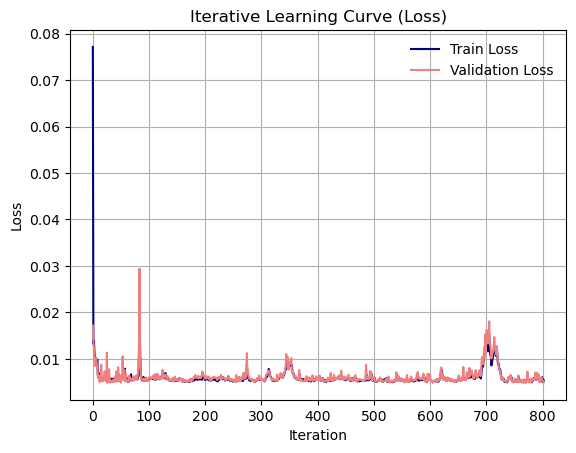

In [9]:
plt.plot(net.history[:, 'train_loss'], label='Train Loss', color='navy')
plt.plot(net.history[:, 'valid_loss'], label='Validation Loss', color='lightcoral')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Iterative Learning Curve (Loss)")
plt.grid(visible=True)
plt.legend(frameon=False)

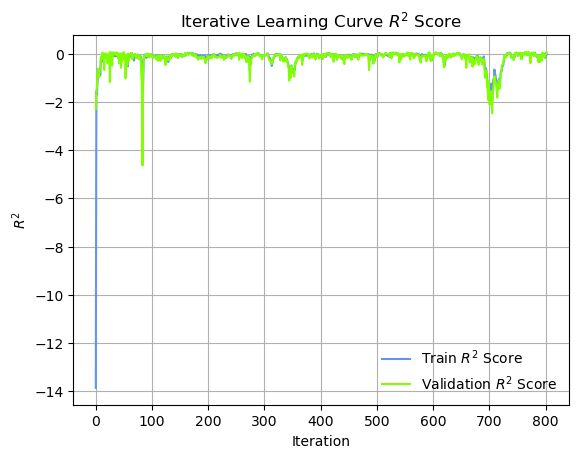

In [10]:
plt.plot(net.history[:, 'train_r2'], label='Train $R^2$ Score', color='cornflowerblue')
plt.plot(net.history[:, 'validation_r2'], label='Validation $R^2$ Score', color='chartreuse')
plt.xlabel("Iteration")
plt.ylabel("$R^2$")
plt.title(r"Iterative Learning Curve $R^2$ Score")
plt.grid(visible=True)
plt.legend(frameon=False)